In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Searching and Fitting

   * finding roots; transcendental equation solutions
   * fitting polynomials and splines
   * fitting by searching for minimization

## Solving for Roots of Equations

Problem: find values of $x$ for which $f(x)=0$.

Solution: different methods. Here we'll look at two:
* bisection method
* Newton-Raphson method (local slope)

which work by trial and error:

1. Choose a first-guess trial value of $x$ or range of $x$ values.
2. Compute $f(x)$. The result is generally non-zero (unless the first guess was perfect). This is the error.
3. Use information from the error to make a new guess and go back to step 2.
   * as we're looking for a zero, values of $x$ that are high or low return errors of opposite sign.
4. Iterate until you reach an exit criterion (typically either a maximum number of iterations or convergence to some precision).

NOTE: you can't use these methods blindly. See textbook discussion in section 7.2 and Problem set 4.

### Bisection method

First-guess trial: start with an estimate of the interval of $x$ values in which the root resides: at one end of the interval $f(x_+)$ is positive and at the other end $f(x_-)$ is negative.

Next, split the interval using the midpoint value of $x$ (hence the name of the method) and test to see if the sign flips in the upper half or the lower half. Make the bisecting value the new endpoint of that half. Iterate. In this way, the algorithm closes in on the root.

This process continues until the the remaining interval is less than a
predefined size (precision) or until a predefined (large) number of bisecting iterations occurs.

In pseudocode:

       x = ( xPlus + xMinus ) / 2
       if ( f(x) * f(xPlus) > 0 ) xPlus = x
          else xMinus = x



<img src="Figures/Figure_7.1.png" width="50%">

Example: find the root of $f(x) = 2\cos(x) - x$:


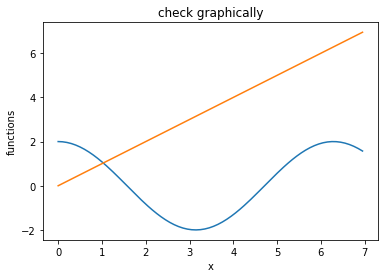

In [2]:
x=np.arange(0.,7.,.05)
fn=2.*np.cos(x)
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(x, fn)
plt.plot(x, x)
plt.xlabel('x')
plt.ylabel('functions')
plt.title('check graphically')
plt.show()

In [3]:
# Root finding with bisection method
def f(x):                                      
    return 2*np.cos(x)-x

def bisection(xminus, xplus, Nmax, eps):       # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("iteration %2d: x = %.6f and f(x) = %9.6f" % (it, x, f(x)))
        if (f(xplus)*f(x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("root found with precision = ",eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return x  

eps=1e-6
a=0.0
b=7.0
Nmax=100
root=bisection(a, b, Nmax, eps)
print("Root = %.7f"%root)

iteration  0: x = 3.500000 and f(x) = -5.372913
iteration  1: x = 1.750000 and f(x) = -2.106492
iteration  2: x = 0.875000 and f(x) =  0.406994
iteration  3: x = 1.312500 and f(x) = -0.801632
iteration  4: x = 1.093750 and f(x) = -0.175435
iteration  5: x = 0.984375 and f(x) =  0.122393
iteration  6: x = 1.039062 and f(x) = -0.025005
iteration  7: x = 1.011719 and f(x) =  0.049090
iteration  8: x = 1.025391 and f(x) =  0.012139
iteration  9: x = 1.032227 and f(x) = -0.006409
iteration 10: x = 1.028809 and f(x) =  0.002871
iteration 11: x = 1.030518 and f(x) = -0.001767
iteration 12: x = 1.029663 and f(x) =  0.000552
iteration 13: x = 1.030090 and f(x) = -0.000608
iteration 14: x = 1.029877 and f(x) = -0.000028
iteration 15: x = 1.029770 and f(x) =  0.000262
iteration 16: x = 1.029823 and f(x) =  0.000117
iteration 17: x = 1.029850 and f(x) =  0.000045
iteration 18: x = 1.029863 and f(x) =  0.000009
iteration 19: x = 1.029870 and f(x) = -0.000010
iteration 20: x = 1.029867 and f(x) = -0

There are ways this can get into trouble, particularly if the function runs off toward infinity in the interval (e.g., tan(x)). It is good to plot the function whenever possible. See problem set 4.

---------
---------
### Newton-Raphson Method

Now add local slope information to guide the trials.

Draw a line $mx+b$ tangent to the curve and use the intercept of that line with the $x$ axis ($x = −b/m$) as the next guess for the root.

The process continues until some set level of
precision, or a maximum number of iterations, is reached. 

When $f(x)$ is nearly linear, then the convergence should be faster than for the bisection algorithm.

In each iteration, start with the old guess $x_0$ and express a new guess $x$ as a correction $\Delta x$ to the old guess:

$$
x  =  x_0 + \Delta x = \mbox{new guess}
$$

Expand the known function $f(x)$ in a Taylor series around
$x_0$ and keep only the linear terms:

$$f(x = x_0 + \Delta x) \simeq f(x_0) + \left. \frac{d f}
{dx}\right|_{x_0} \Delta x$$

Determine the correction $\Delta x$ by calculating the point at which the
linear approximation to $f(x)$ crosses the $x$ axis:

$$\begin{align}
  f(x_0) + \left. \frac{d f} {dx}\right|_{x_0} \Delta x  & = 0 ,\\
 \Rightarrow  \quad   \Delta x & = - \frac{f(x_0)} {  \left. {(df /
    dx)}\right|_{x_0}}
\end{align}$$

Repeat. 

<img src="Figures/Figure_7.2.png" width="50%">

The disadvantages of this method are
1. It requires you to calculate the derivative of the function) analytically or numerically, in addition to the function itself.
2. It could miss the zero of a rapidly-varying function, if the straight-line extrapolation to the $x$-axis jumps over the zero to another point with the same-sign derivative. Think about a sinusoid.

To mitigate disadvantage \#1, we can calculate the forward difference derivative
$$\frac{d f} {d x} \simeq \frac{f (x + \delta x) - f (x)}{\delta x}$$
so that we can re-use the evaluation $f(x)$ that we already performed.

Try $f(x) = 2\cos(x) -x$ again:

In [4]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed 
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# NewtonCD.py    Newton-Raphson Search with forward difference
import numpy as np

x = 4.
dx = 3.e-1
eps = 1.e-6
imax = 100                                        # Max no of iterations

def f(x):                                                     # Function
    return 2*np.cos(x) - x

for it in range(0, imax + 1):
    F = f(x)
    if ( abs(F) <= eps ):                         # Check for convergence
        print("\n Root found at x = %.7f, f(x) = %.5e, precision eps = %e" % (x, F, eps)) 
        break
    print("Iteration ", it, " x = ", x, " f(x) = ", F)
    df = (f(x + dx) - f(x))/dx                            # Forward difference
    dx = - F/df 
    x += dx                                               # New guess

Iteration  0  x =  4.0  f(x) =  -5.307287241727224
Iteration  1  x =  11.740749215681033  f(x) =  -10.384548440431919
Iteration  2  x =  0.9987770197629118  f(x) =  0.08388498810969591
Iteration  3  x =  1.1148991974395954  f(x) =  -0.23436321106717994
Iteration  4  x =  1.0324572710157693  f(x) =  -0.007035917319504259
Iteration  5  x =  1.0298249880685695  f(x) =  0.00011276120515502086

 Root found at x = 1.0298666, f(x) = -5.73114e-08, precision eps = 1.000000e-06


**Pretty much the same result as the bisection method, but after iteration 5 instead of iteration 22.** 

---------------------
------------------------

Now, embark on fitting functions to data points. 

-------
### First, an important discussion: *WHY* do we want to fit a function to data?? 
* this is a good question, as it informs our choices. 
* we might want to fit data to determine a physical parameter. In that case, we must have some knowledge of the function and its applicability to the particular case. 
  * For example, fitting a Gaussian to data that are not Gaussian is often not sensible.
* sometimes we need a continuous function for some purpose. This is mainly a matter of interpolation.
  * For example, we might want to simulate the statistics of the result many times to understand the probability of obtaining a particular result. We need a function for the random number generator. 
  * Or we might need the value between data points.

Bottom line: fitting is an essential tool. However, successfully fitting data with a function doesn't necessarily mean you have added any new information, and you may have *lost* information by imposing your incorrect prejudice of what the data *should* be.

-------

### Polynomial fits, Lagrange method

With $N$ data points, we can find the parameters for a $(N-1)$ degree polynomial. 
* For example, with $N=2$ points, we can find a line that goes through both points.

Unless there is some underlying theoretical reason why the data should follow a polynomial, this is most likely a case of just needing a continuous function. 

No searches are required, just some linear algebra.

We want the value of $f(x)$ at some point between the given $x$ values, regardless of the error on each value (errors will matter soon, when we do more sophisticated fits). 

Given $N$ data points, we try approximating $g(x)$ as a $(N-1)$-degree polynomial over the entire interval.

Write the expansions of a function at two points $x_1$ and $x_2$. We already know the values $f(x_1)$ and $f(x_2)$, and we want to find $f(x)$ and $f'(x)$ for other $x$. We have

$$\begin{align}
f(x_1) &= f(x) + (x_1 - x) f'(x) + \cdots \\
f(x_2) &= f(x) + (x_2 - x) f'(x) + \cdots
\end{align}$$

Approximate the true function with a polynomial $p(x)$, which we can define so it satisfies the equality exactly:
$$\begin{align}
f(x_1) &= p(x) + (x_1 - x) p'(x) \\
f(x_2) &= p(x) + (x_2 - x) p'(x)
\end{align}$$

Two equations in two unknowns ($p$ and $p'$) so

$$
p(x) = \frac{x-x_2}{x_1-x_2} f(x_1) + \frac{x_1-x}{x_1-x_2} f(x_2)
$$

This is the equation for **a line through the points $(x_1, f(x_1))$ and $(x_2, f(x_2))$**.

----------

To extend to higher orders, add more terms in the series expansion and more data points to find the unknowns. 

The next-order set of equations:

$$\begin{align}
f(x_1) &= p(x) + (x_1 - x) p'(x) + \frac{(x_1 -x )^2}{2} p''(x) \cdots \\
f(x_2) &= p(x) + (x_2 - x) p'(x) + \frac{(x_2 -x )^2}{2} p''(x) \cdots \\
f(x_3) &= p(x) + (x_3 - x) p'(x) + \frac{(x_3 -x )^2}{2} p''(x) \cdots
\end{align}$$

yield the solution

$$
p(x) = \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}\ f(x_1) + \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}\ f(x_2) + \frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}\ f(x_3)
$$

This is the quadratic polynomial that passes through all three points.

Generalizing:
* Call the independent variable $x$ and its tabulated values $x_i (i= 1,2, \ldots)$
* The dependent variable is the function $g(x)$, with tabulated values $g_i = g(x_i)$. 

then the formula for the Lagrange polynomial of order $N-1$ is:

$$\begin{align}
g(x) &\simeq  g_{1}\lambda_{1}(x) + g_{2}\lambda_{2}(x) + \cdots +
g_{n}\lambda_{n}(x),\\
\lambda_{i}(x) & =  \prod_{j (\neq i)=1}^{n}
\frac{x-x_{j}}{x_{i}-x_{j}} = \frac{x-x_1} { x_i-x_1} \frac{x-x_2}
{ x_i-x_2} \cdots \frac{x-x_n} { x_i-x_n}
\end{align}$$

The coefficients $g_i$ are the tabulated (known) values $g(x_i)$ for specific points $x_i$.

**Example**

Giuven the points and function values

$$x_{1-4}  = (0 ,1 ,2, 4) \qquad  g_{1-4}  =(-12,-12,-24,-60)$$

the Lagrange formula yields a third-order polynomial that reproduces each of the tabulated values:

$$\begin{align}
g(x) &=  \frac{(x-1)(x-2)(x-4)}{(0-1)(0-2)(0-4)}(-12) +
\frac{x(x-2)(x-4)}{(1-0)(1-2)(1-4)}(-12)  \\
&+ \frac{x(x-1)(x-4)}{(2-0)(2-1)(2-4)}(-24) +
\frac{x(x-1)(x-2)}{(4-0)(4-1)(4-2)}(-60),  \\ \\
\Rightarrow \quad g(x) &=  x^{3} - 9x^{2} + 8x -12
\end{align}$$

------
------
Remember: the polynomial is only guaranteed to pass through the given points; its behavior everywhere else may be silly, as shown in the following example.

----- 
-----

**Example**
Your book's example: experimental values for a scattering cross section, each with error $\pm\sigma_i$, as a function of energy given in this table:

|$i=$ | 1|2|3|4|5|6|7|8|9|
|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|
|$E_i$ (MeV) |0|25|50|75|100|125|150|175|200|
| $g(E_i)$(mb)|10.6|16.0|45.0|83.5|52.8|19.9|10.8|8.25|4.7|
| Error (mb)|9.34|17.9 |41.5 |85.5|51.5|21.5|10.8 |6.29 |4.14|


The 8th-order polynomial function fit to the 9 points is shown ("Lagrange") in the figure, along with other interpolation methods, which we will now discuss.

<img src="Figures/Figure_7.5.png" width="60%">




###  "Natural" Cubic Spline Local Interpolation

This is sophisticated version of "connect the dots": fit cubic polynomials to the function separately in each local
interval, with the constraint that the first and second
derivatives of the polynomials be continuous from one interval to the
next. "*This continuity of slope and curvature is what makes the spline fit particularly eye-pleasing.*"

We'll go through this quickly, as the canned algorithms (see below) do a good job and there isn't much physics here, so you can safely skip the details.

The form of the cubic spline is

$$
g_{i}(x) =  g_{i} +g_i^\prime (x-x_{i})
+\frac{1}{2} g_{i}^{\prime\prime}(x-x_{i})^{2}
+\frac{1}{6}g_{i}^{\prime\prime\prime}(x-x_{i})^{3}
$$ 

and matching of the first and second derivatives at each interval’s
boundaries provides the equations

$$
g_{i-1}^\prime (x_{i}) = g_i^\prime(x_{i}), \quad g_{i-1}^{\prime\prime}(x_{i}) =
g_{i}^{\prime\prime}(x_{i})
$$

* The additional equations needed are obtained by matching the third derivatives at adjacent nodes that connect intervals. Values for the third derivatives are found by approximating them in terms of the second derivatives:

$$
g_{i}''' \simeq \frac{g_{i+1}'' - g_{i}''}{x_{i+1} - x_{i}}
$$

* The remaining constraints come from boundary conditions at the edge of the interval.
    * For the "natural" spline, the boundary conditions are chosen to be:

$$g''(a) = g''(b) = 0$$

(They were already required to be equal; in this case they are required to be 0.)

There are other choices possible. See your textbook section 7.5.2. There is also a code listing you can adapt, if you like.

------
------
------
------
### Canned Implementations


#### Root-Finding Routines

Newton-Raphson method: `scipy.optimize.newton`.  See 
[scipy.optimize reference guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)
This implementation requires a preliminary guess that is not too far away from the actual zero.

In [5]:
from scipy.optimize import newton
def f(z):                                      
    return 2*np.cos(z)-z

preliminary_guess = 2.
root = newton(f, preliminary_guess)
print(root)

1.0298665293222307


But be careful!  These root-finding methods can get confused.  Plotting the function, if you can, is always a good check.  Other root finders in `scipy.optimize` are most robust and complicated. Let's try them on Problem Set 4 (finite square well bound states...of course, you are writing your own for that problem):

In [6]:
def g(z): # test function, finite square well
    z0=8.
    return np.sqrt((z0/z)**2-1) - np.tan(z)

print(newton(g, np.pi/2.))
print(newton(g, 3.*np.pi/2.))
print(newton(g, 5.*np.pi/2.))
print(newton(g, 7.*np.pi/2.))

new_xvalues = np.linspace(0,20)
new_fvalues = g(new_xvalues)
plt.plot(new_xvalues, new_fvalues)
plt.show()

1.571053406427576
4.712960219282728
7.8548670321378795


/Users/ritz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


RuntimeError: Failed to converge after 50 iterations, value is nan

That's good! You'll see there are no roots beyond the one around $\frac{5\pi}{2}$.

#### Cubic Spline Fitting 

`scipy.interpolate.CubicSpline`.  See
[scipy.interpolate reference guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) for more details and default values.

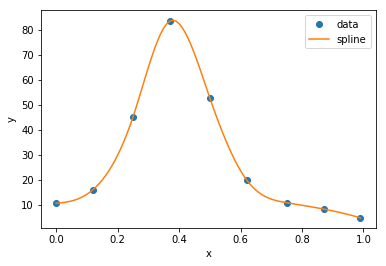

In [17]:
from scipy.interpolate import CubicSpline
x = np.array([0., 0.12, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 0.99])    # input
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
# output fit values
xout = np.arange(0.,1.,.01)
cs = CubicSpline(x, y) # same table of tabulated values
plt.plot(x, y, 'o', label='data')
plt.plot(xout, cs(xout), label='spline')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Success, but in the end so what? It can be useful if you need a smooth function and you only have points, but remember that merely solves a practical problem -- it doesn't necessarily add new physics information.

Also, beware what happens outside the interval for $x$ between 0 and 1.

On to fitting by minimization, whereby we can extract physical parameters from data sets.